## Importing the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [38]:
dataset = pd.read_csv("train-data.csv", index_col = 0)

In [39]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [41]:
dataset.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36


In [42]:
dataset.drop(columns=["New_Price"], inplace = True)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


In [44]:
# Remove units and convert to float
dataset['Mileage'] = dataset['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
dataset['Engine'] = dataset['Engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
dataset['Power'] = dataset['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Fill missing with median
dataset['Mileage'].fillna(dataset['Mileage'].median(), inplace=True)
dataset['Engine'].fillna(dataset['Engine'].median(), inplace=True)
dataset['Power'].fillna(dataset['Power'].median(), inplace=True)

/tmp/ipython-input-44-1119620930.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Mileage'].fillna(dataset['Mileage'].median(), inplace=True)
/tmp/ipython-input-44-1119620930.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [45]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [47]:
dataset.Seats.fillna(dataset.Seats.median(), inplace = True)

/tmp/ipython-input-47-2230038140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Seats.fillna(dataset.Seats.median(), inplace = True)


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [49]:
# Car Age
dataset['Car_Age'] = 2025 - dataset['Year']
dataset.drop(columns=['Year'], inplace=True)

# Extract brand from name
dataset['Brand'] = dataset['Name'].str.split(' ').str[0]
dataset.drop(columns=['Name'], inplace=True)

In [50]:
dataset.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,15,Maruti
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10,Hyundai
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,14,Honda
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,13,Maruti
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,12,Audi


## Splitting the data

In [55]:
from sklearn.model_selection import train_test_split
X = dataset.drop("Price", axis=1)
y = dataset["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 0)

## One Hot Encoding and Feature Scaling

In [56]:
categorical_columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Brand"]
numerical_columns = ["Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Car_Age"]

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown = "ignore"), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [59]:
X_train_processed

array([[ 0.        ,  0.        ,  1.        , ..., -0.45473271,
        -0.34012547, -1.10480625],
       [ 0.        ,  0.        ,  0.        , ..., -0.23940798,
         2.15447336,  0.11229427],
       [ 0.        ,  0.        ,  0.        , ..., -0.81258827,
        -0.34012547,  2.5464953 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.14271221,
         3.40177278,  0.4165694 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.26116947,
        -0.34012547, -1.10480625],
       [ 0.        ,  0.        ,  0.        , ..., -0.73616423,
        -0.34012547,  0.4165694 ]])

In [60]:
X_test_processed

array([[ 0.        ,  0.        ,  0.        , ...,  0.5248324 ,
         2.15447336, -0.19198086],
       [ 0.        ,  0.        ,  0.        , ..., -0.2833518 ,
        -0.34012547,  1.02511965],
       [ 0.        ,  0.        ,  0.        , ..., -0.17062635,
        -0.34012547,  0.4165694 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.45912709,
        -0.34012547, -1.10480625],
       [ 0.        ,  0.        ,  0.        , ...,  0.09112598,
        -0.34012547, -0.19198086],
       [ 0.        ,  0.        ,  0.        , ..., -0.86799569,
        -0.34012547, -0.49625599]])

In [62]:
y_train = np.array(y_train)

In [63]:
y_train

array([ 9.18,  3.49,  1.1 , ...,  6.25, 11.5 ,  4.3 ])

In [64]:
y_test = np.array(y_test)
y_test

array([7.25, 4.25, 3.9 , ..., 8.5 , 6.25, 3.87])

## Training the XGBoost model

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb.fit(X_train_processed, y_train)
print("R2 Score: " + str(r2_score(y_test, xgb.predict(X_test_processed))))

R2 Score: 0.909984841959185


## Applying Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators" : [100, 200, 400, 500, 600, 800, 1000],
    "learning_rate" : [0.01, 0.05, 0.1, 0.15, 0.2]
}
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid.fit(X_train_processed, y_train)
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

In [70]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.2, n_jobs=4)
xgb.fit(X_train_processed, y_train)
print("R2 Score: " + str(r2_score(y_test, xgb.predict(X_test_processed))))

R2 Score: 0.9011926640838699


## Visualizing The Results

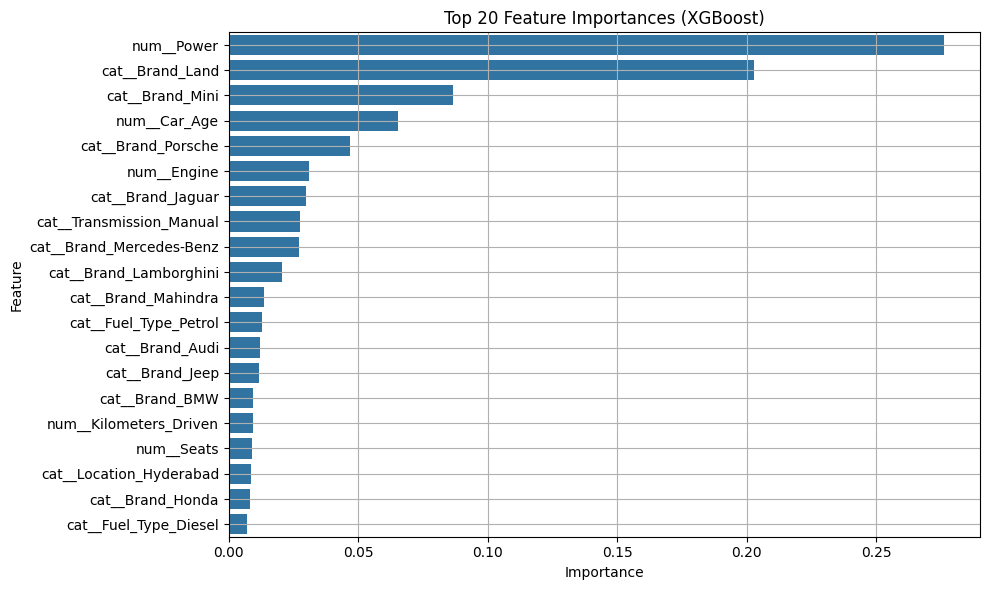

In [71]:
importances = xgb.feature_importances_
feature_names = preprocessor.get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=feature_names[indices][:20])
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()